In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [ ]:
data = pd.read_excel("banjir_2020-2024_ver.xlsx")
data['Tahun']=data['Tahun'].ffill()
data.head()

,Tahun,Wilayah,Jumlah Kejadian,Korban,Rumah terdampak,Fasilitas terdampak
0,2020.0,Aceh,86,220520.0,46044.0,24.0
1,2020.0,Sumatera Utara,78,371514.0,81498.0,43.0
2,2020.0,Sumatera Selatan,56,36876.0,11795.0,49.0
3,2020.0,Sumatera Barat,85,40166.0,7091.0,61.0
4,2020.0,Bengkulu,22,22462.0,3233.0,30.0


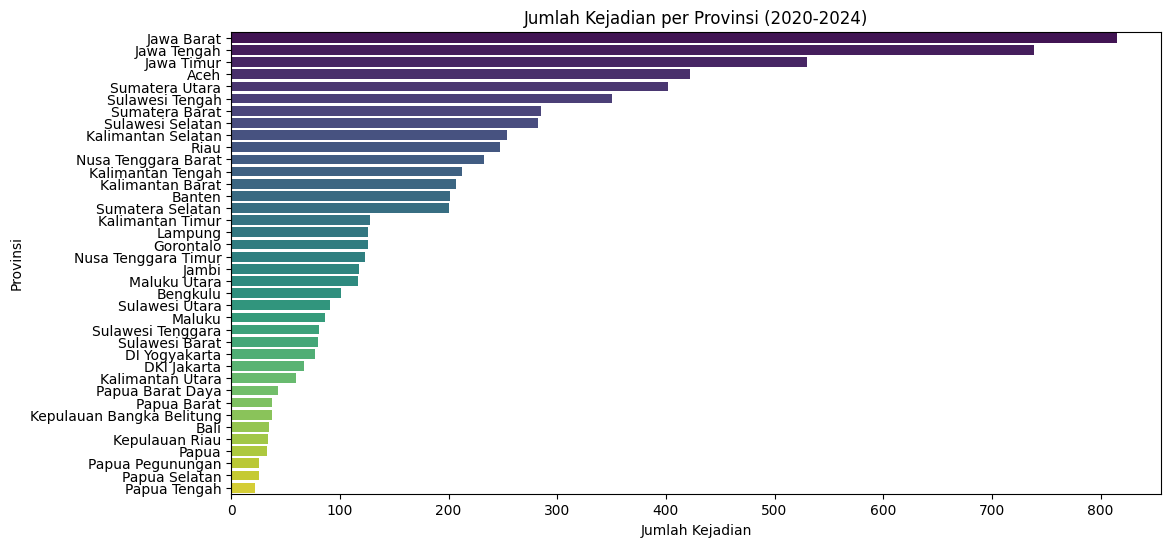

In [ ]:
kejadian_per_provinsi = data.groupby("Wilayah")["Jumlah Kejadian"].sum().sort_values(ascending=False)

#frekuensi per tahun
plt.figure(figsize=(12, 6))
sns.barplot(x=kejadian_per_provinsi.values, y=kejadian_per_provinsi.index, hue=kejadian_per_provinsi.index, palette="viridis", legend=False)
plt.title("Jumlah Kejadian per Provinsi (2020-2024)")
plt.xlabel("Jumlah Kejadian")
plt.ylabel("Provinsi")
plt.show()

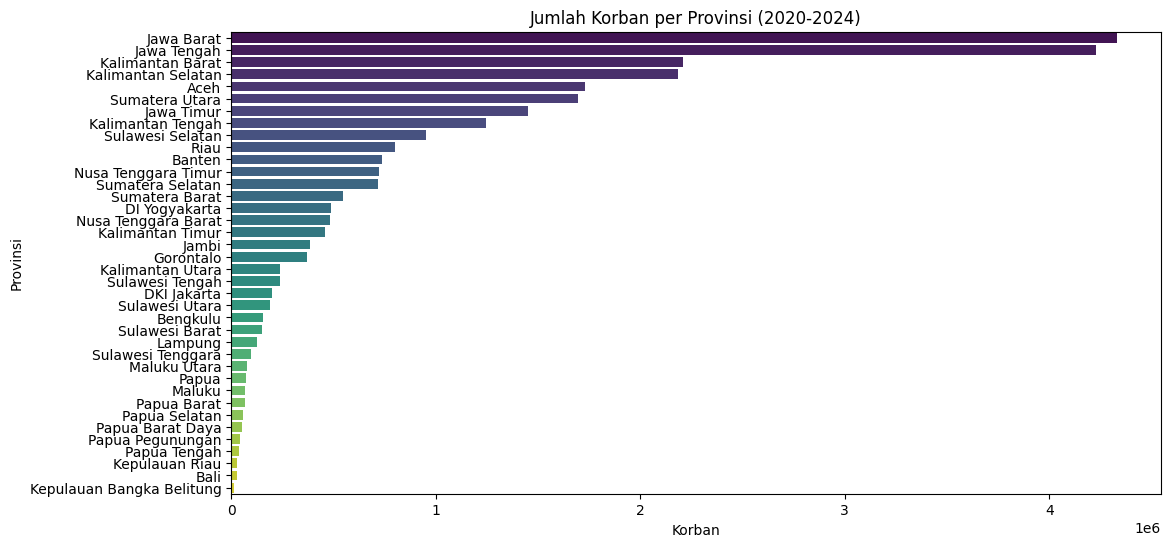

In [ ]:
kejadian_per_provinsi = data.groupby("Wilayah")["Korban"].sum().sort_values(ascending=False)

#frekuensi per tahun
plt.figure(figsize=(12, 6))
sns.barplot(x=kejadian_per_provinsi.values, y=kejadian_per_provinsi.index, hue=kejadian_per_provinsi.index, palette="viridis", legend=False)
plt.title("Jumlah Korban per Provinsi (2020-2024)")
plt.xlabel("Korban")
plt.ylabel("Provinsi")
plt.show()

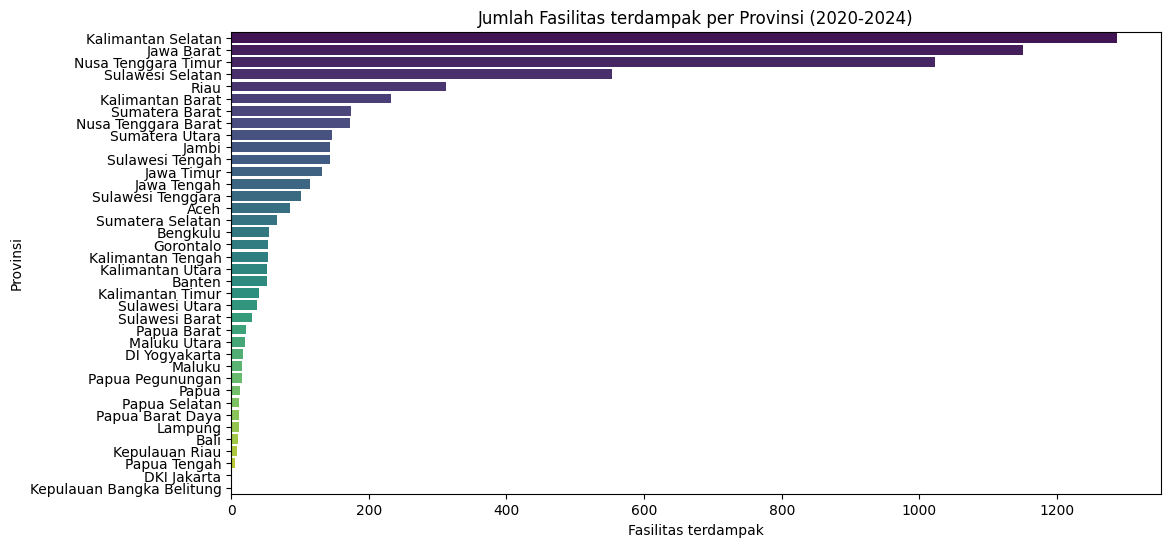

In [ ]:
kejadian_per_provinsi = data.groupby("Wilayah")["Fasilitas terdampak"].sum().sort_values(ascending=False)

#frekuensi per tahun
plt.figure(figsize=(12, 6))
sns.barplot(x=kejadian_per_provinsi.values, y=kejadian_per_provinsi.index, hue=kejadian_per_provinsi.index, palette="viridis", legend=False)
plt.title("Jumlah Fasilitas terdampak per Provinsi (2020-2024)")
plt.xlabel("Fasilitas terdampak")
plt.ylabel("Provinsi")
plt.show()

In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tahun                190 non-null    float64
 1   Wilayah              190 non-null    object 
 2   Jumlah Kejadian      190 non-null    int64  
 3   Korban               190 non-null    float64
 4   Rumah terdampak      190 non-null    float64
 5   Fasilitas terdampak  190 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.0+ KB


(190, 6)

In [ ]:
data.shape

(190, 6)

In [ ]:
data.isnull().sum()

,0
Tahun,0
Wilayah,0
Jumlah Kejadian,0
Korban,0
Rumah terdampak,0
Fasilitas terdampak,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tahun                190 non-null    float64
 1   Wilayah              190 non-null    object 
 2   Jumlah Kejadian      190 non-null    int64  
 3   Korban               190 non-null    float64
 4   Rumah terdampak      190 non-null    float64
 5   Fasilitas terdampak  190 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.0+ KB


In [ ]:
fitur_numerik = ["Jumlah Kejadian", "Korban", "Fasilitas terdampak", "Rumah terdampak"]
X = data[fitur_numerik].values

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.14204132e+00,  2.84275905e-01, -7.24134700e-02,
         5.57674822e-02],
       [ 9.55083563e-01,  8.57819614e-01,  7.12593119e-02,
         3.10450074e-01],
       [ 4.40949720e-01, -4.13287316e-01,  1.16629664e-01,
        -1.90259034e-01],
       [ 1.11867160e+00, -4.00790403e-01,  2.07370368e-01,
        -2.24050056e-01],
       [-3.53620765e-01, -4.68038227e-01, -2.70431178e-02,
        -2.51763867e-01],
       [-4.23729926e-01, -4.95956861e-01, -2.53894879e-01,
        -2.42109289e-01],
       [-7.97645448e-01, -5.43984509e-01, -2.46333153e-01,
        -2.71841653e-01],
       [ 4.36644771e-02, -3.04100766e-01, -2.38771428e-01,
        -1.15809595e-01],
       [-3.30251045e-01, -4.98106786e-01, -2.08524526e-01,
        -2.15113825e-01],
       [-7.97645448e-01, -5.51668781e-01, -2.53894879e-01,
        -2.74707856e-01],
       [ 3.70840559e-01,  9.11089128e-01,  5.32524559e-01,
         3.30922951e-01],
       [-3.53620765e-01, -1.07162340e-01,  1.83272344e-02,
      

In [ ]:
X = data.iloc[:,2:6].values
print(X)

[[8.600000e+01 2.205200e+05 4.604400e+04 2.400000e+01]
 [7.800000e+01 3.715140e+05 8.149800e+04 4.300000e+01]
 [5.600000e+01 3.687600e+04 1.179500e+04 4.900000e+01]
 [8.500000e+01 4.016600e+04 7.091000e+03 6.100000e+01]
 [2.200000e+01 2.246200e+04 3.233000e+03 3.000000e+01]
 [1.900000e+01 1.511200e+04 4.577000e+03 0.000000e+00]
 [3.000000e+00 2.468000e+03 4.380000e+02 1.000000e+00]
 [3.900000e+01 6.562100e+04 2.215900e+04 2.000000e+00]
 [2.300000e+01 1.454600e+04 8.335000e+03 6.000000e+00]
 [3.000000e+00 4.450000e+02 3.900000e+01 0.000000e+00]
 [5.300000e+01 3.855380e+05 8.434800e+04 1.040000e+02]
 [2.200000e+01 1.174680e+05 1.008700e+04 3.600000e+01]
 [6.200000e+01 1.485750e+05 3.702300e+04 9.000000e+00]
 [6.300000e+01 2.941150e+05 6.469100e+04 5.100000e+01]
 [7.000000e+00 3.750000e+02 1.820000e+02 1.000000e+00]
 [4.200000e+01 3.304360e+05 3.066600e+04 2.800000e+01]
 [2.100000e+01 1.243780e+05 3.967000e+03 0.000000e+00]
 [2.080000e+02 1.727304e+06 3.727820e+05 6.470000e+02]
 [2.560000

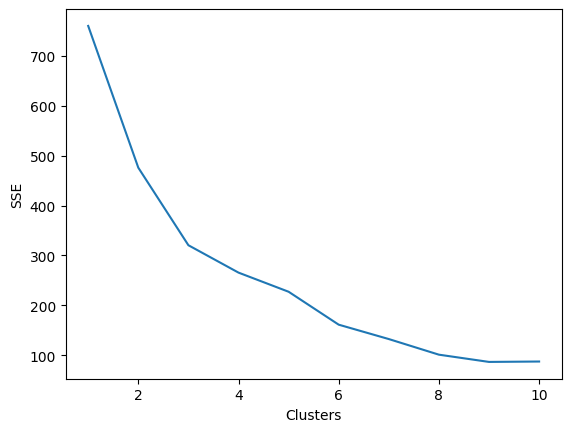

In [ ]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X_scaled)
    wcss.append(k_means.inertia_)

plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')

plt.show()

In [ ]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X_scaled)
print(y)

[3 3 0 3 0 0 0 0 0 0 3 0 3 3 0 3 0 1 2 0 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 3 3 0 0 0 3 0 0 0 0 3 0 1 3 0 0 0 2 2 0 2 0 1 1 0 0 3 0 0 3 0 0 0 0 0 0
 0 0 3 3 0 0 0 0 0 0 0 0 3 0 0 3 0 3 0 2 2 0 2 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 3 3 0 3 0 3 0 0 0 0 0 0 3 3 0 0 0 3 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 3 0 3 0 0 0 0 3 0 3 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 0]


In [ ]:
data['cluster'] = y

In [ ]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

In [ ]:
data2

,Tahun,Wilayah,Jumlah Kejadian,Korban,Rumah terdampak,Fasilitas terdampak,cluster
17,2020.0,Jawa Barat,208,1727304.0,372782.0,647.0,1
50,2021.0,Kalimantan Selatan,62,1196235.0,0.0,1274.0,1
60,2021.0,Nusa Tenggara Timur,59,630876.0,970937.0,997.0,1
61,2021.0,Nusa Tenggara Barat,79,207648.0,1440801.0,130.0,1


In [ ]:
data1

,Tahun,Wilayah,Jumlah Kejadian,Korban,Rumah terdampak,Fasilitas terdampak,cluster
2,2020.0,Sumatera Selatan,56,36876.0,11795.0,49.0,0
4,2020.0,Bengkulu,22,22462.0,3233.0,30.0,0
5,2020.0,Riau,19,15112.0,4577.0,0.0,0
6,2020.0,Kepulauan Riau,3,2468.0,438.0,1.0,0
7,2020.0,Jambi,39,65621.0,22159.0,2.0,0
...,...,...,...,...,...,...,...
185,2024.0,Papua,5,2555.0,514.0,0.0,0
186,2024.0,Papua Tengah,5,5380.0,495.0,0.0,0
187,2024.0,Papua Pegunungan,5,5211.0,1372.2,1.0,0
188,2024.0,Papua Selatan,2,3010.0,896.0,0.0,0


In [ ]:
fitur_numerik = ["Jumlah Kejadian", "Korban", "Rumah terdampak", "Fasilitas terdampak"]

rata_rata_per_tahun_cluster = data.groupby(['Tahun', 'cluster'])[fitur_numerik].mean().reset_index()

print("Rata-rata Fitur per Tahun dan Cluster:")
display(rata_rata_per_tahun_cluster)

Rata-rata Fitur per Tahun dan Cluster:


,Tahun,cluster,Jumlah Kejadian,Korban,Rumah terdampak,Fasilitas terdampak
0,2020.0,0,15.629630,2.875915e+04,5364.444444,12.666667
1,2020.0,1,208.000000,1.727304e+06,372782.000000,647.000000
2,2020.0,2,256.000000,3.135840e+05,56873.000000,41.000000
3,2020.0,3,73.000000,2.576364e+05,55986.444444,95.333333
4,2021.0,0,23.480000,3.345880e+04,6636.480000,8.920000
5,2021.0,1,66.666667,6.782530e+05,803912.666667,800.333333
6,2021.0,2,183.000000,9.281657e+05,0.000000,77.000000
7,2021.0,3,72.857143,3.374339e+05,185247.142857,38.285714
8,2022.0,0,21.000000,4.019200e+04,9344.931034,4.241379
9,2022.0,2,173.333333,7.632093e+05,134075.666667,48.666667


In [ ]:
cluster_per_tahun = data.groupby(['Wilayah', 'cluster']).agg(
    Tahun=('Tahun', lambda x: sorted(x.unique())),
    Jumlah_Kejadian=('Jumlah Kejadian', 'sum'),
    Korban=('Korban', 'sum'),
    Rumah_terdampak=('Rumah terdampak', 'sum')
).reset_index()

def format_years(year_list):
    all_years = [2020, 2021, 2022, 2023, 2024]
    if sorted(year_list) == all_years:
        return '2020-2024'
    else:
        return ', '.join(map(str, year_list))


cluster_per_tahun['Tahun'] = cluster_per_tahun['Tahun'].apply(format_years)
cluster_per_tahun = cluster_per_tahun.sort_values(by='Jumlah_Kejadian', ascending=False)

data_cluster0 = cluster_per_tahun[cluster_per_tahun['cluster'] == 0].copy()
data_cluster1 = cluster_per_tahun[cluster_per_tahun['cluster'] == 1].copy()

In [ ]:
data_cluster0

,Wilayah,cluster,Tahun,Jumlah_Kejadian,Korban,Rumah_terdampak
49,Sulawesi Tengah,0,"2020.0, 2023.0, 2024.0",166,143302.0,18636.0
55,Sumatera Selatan,0,"2020.0, 2021.0, 2022.0, 2023.0",160,201817.0,93448.0
26,Kalimantan Timur,0,2020-2024,128,459324.0,88708.0
30,Lampung,0,2020-2024,126,128421.0,24912.0
9,Gorontalo,0,2020-2024,126,369527.0,56280.0
10,Jambi,0,2020-2024,118,383076.0,100618.0
32,Maluku Utara,0,2020-2024,117,78221.0,34451.0
3,Banten,0,"2021.0, 2023.0, 2024.0",107,174585.0,7749.0
47,Sulawesi Selatan,0,"2022.0, 2023.0",106,196099.0,33624.0
5,Bengkulu,0,2020-2024,101,154739.0,23904.0


In [ ]:
data_cluster1

,Wilayah,cluster,Tahun,Jumlah_Kejadian,Korban,Rumah_terdampak
11,Jawa Barat,1,2020.0,208,1727304.0,372782.0
34,Nusa Tenggara Barat,1,2021.0,79,207648.0,1440801.0
22,Kalimantan Selatan,1,2021.0,62,1196235.0,0.0
37,Nusa Tenggara Timur,1,2021.0,59,630876.0,970937.0


In [ ]:
fitur_numerik = ["Jumlah Kejadian", "Korban","Rumah terdampak", "Fasilitas terdampak"]

rata_rata_cluster = data.groupby('cluster')[fitur_numerik].mean()

print("Rata-rata Fitur per Cluster (menggunakan data asli):")
print(rata_rata_cluster)

Rata-rata Fitur per Cluster (menggunakan data asli):
         Jumlah Kejadian         Korban  Rumah terdampak  Fasilitas terdampak
cluster                                                                      
0              18.784173   35151.264748      6190.142446             6.942446
1             102.000000  940515.750000    696130.000000           762.000000
2             189.285714  769672.714286     65585.714286            59.714286
3              67.775000  341085.512500     79232.025000            48.712500


In [ ]:
fitur_numerik = ["Jumlah Kejadian", "Korban", "Fasilitas terdampak", "Rumah terdampak"]

rata_rata_per_tahun = data.groupby('Tahun')[fitur_numerik].mean()

print("Rata-rata Fitur per Tahun:")
rata_rata_per_tahun

Rata-rata Fitur per Tahun:


,Jumlah Kejadian,Korban,Fasilitas terdampak,Rumah terdampak
Tahun,,,,
2020.0,40.605263,135160.868421,49.684211,28378.236842
2021.0,48.578947,210993.763158,82.184211,101957.368421
2022.0,40.447368,151417.026316,11.447368,29857.605263
2023.0,33.105263,102039.652632,21.552632,480.647368
2024.0,22.921053,128789.171053,3.013158,30729.584211


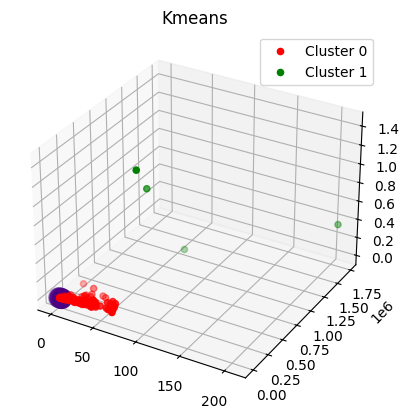

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
kplot.scatter3D(data1['Jumlah Kejadian'], data1['Korban'], data1['Rumah terdampak'], c='red', label = 'Cluster 0')
kplot.scatter3D(data2['Jumlah Kejadian'], data2['Korban'], data2['Rumah terdampak'], c='green', label = 'Cluster 1')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

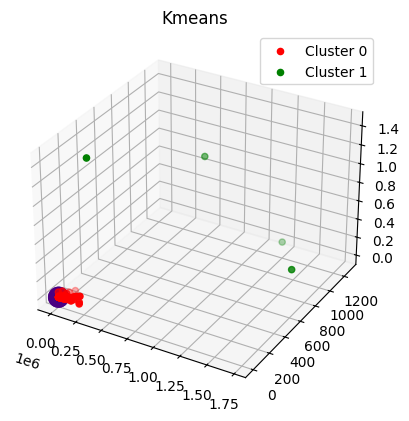

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
kplot.scatter3D(data1['Korban'], data1['Fasilitas terdampak'], data1['Rumah terdampak'], c='red', label = 'Cluster 0')
kplot.scatter3D(data2['Korban'], data2['Fasilitas terdampak'], data2['Rumah terdampak'], c='green', label = 'Cluster 1')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

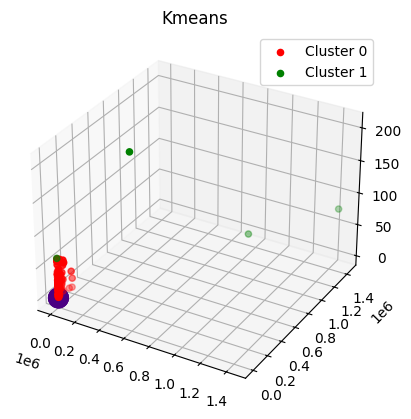

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
kplot.scatter3D(data1['Rumah terdampak'], data1['Rumah terdampak'], data1['Jumlah Kejadian'], c='red', label = 'Cluster 0')
kplot.scatter3D(data2['Rumah terdampak'], data2['Rumah terdampak'], data2['Jumlah Kejadian'], c='green', label = 'Cluster 1')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

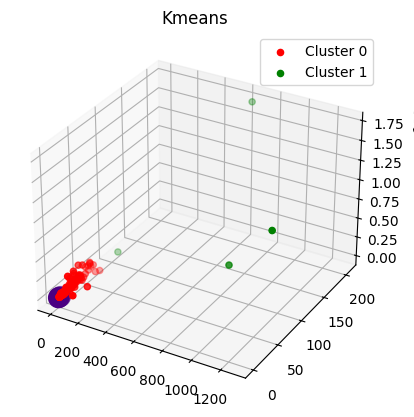

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
kplot.scatter3D(data1['Fasilitas terdampak'], data1['Jumlah Kejadian'], data1['Korban'], c='red', label = 'Cluster 0')
kplot.scatter3D(data2['Fasilitas terdampak'], data2['Jumlah Kejadian'], data2['Korban'], c='green', label = 'Cluster 1')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y)
print(score)

0.6249985886517601


In [ ]:
grouped_by_year_province_cluster = data.groupby(['Tahun', 'Wilayah', 'cluster'])[['Jumlah Kejadian', 'Korban', 'Rumah terdampak', 'Fasilitas terdampak']].sum().reset_index()
grouped_by_year_province_cluster_sorted = grouped_by_year_province_cluster.sort_values(by=['Tahun', 'cluster', 'Jumlah Kejadian'], ascending=[True, False, False])
display(grouped_by_year_province_cluster_sorted)

,Tahun,Wilayah,cluster,Jumlah Kejadian,Korban,Rumah terdampak,Fasilitas terdampak
10,2020.0,Jawa Timur,3,137,301256.0,96645.0,71.0
0,2020.0,Aceh,3,86,220520.0,46044.0,24.0
35,2020.0,Sumatera Barat,3,85,40166.0,7091.0,61.0
37,2020.0,Sumatera Utara,3,78,371514.0,81498.0,43.0
13,2020.0,Kalimantan Tengah,3,63,294115.0,64691.0,51.0
...,...,...,...,...,...,...,...
153,2024.0,Bali,0,2,150.0,30.0,0.0
168,2024.0,Kepulauan Bangka Belitung,0,2,2665.0,563.0,0.0
179,2024.0,Papua Selatan,0,2,3010.0,896.0,0.0
174,2024.0,Nusa Tenggara Timur,0,1,7840.0,1568.0,0.0


In [ ]:
from pandas.io.excel import ExcelWriter

output_filename = "banjir_data_per_provinsi_tahun_cluster.xlsx"
with ExcelWriter(output_filename) as writer:
    for province in grouped_by_year_province_cluster_sorted['Wilayah'].unique():
        province_data = grouped_by_year_province_cluster_sorted[grouped_by_year_province_cluster_sorted['Wilayah'] == province]
        province_data.to_excel(writer, sheet_name=province[:31], index=False)

print(f"Data exported to {output_filename}")

Data exported to banjir_data_per_provinsi_tahun_cluster.xlsx
